In [2]:
%config Completer.use_jedi = False

https://www.kaggle.com/jdelamorena/recall-97-by-using-undersampling-neural-network

# 클론코딩을 통해 데이터를 분석해보자.

원본 노트북에서는 Recall 97%의 수치를 보이고 있고 undersampling 방식과 Neural Network을 사용했다고 밝히고 있다. 따라서 Oversample 방식과 ensemble 방식을 사용한 다른 코드들도 카피하여 학습하도록 한다. 일단 지금은 이 노트북의 클론을 수행한다.

In [7]:
# import
import numpy as np
import pandas as pd
# 와일드 카드는 별로 안좋아하는 편이다. 생략
import matplotlib.pyplot as plt
import seaborn as sns
# plt도 많이 쓰지만 seaborn이 더 확장성이 좋다.
#동일한 데이터, 동일한 플롯이 나올 수 있도록 seaborn을 써보도록 하겠다.

In [8]:
data = pd.read_csv("../data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


우선 데이터에 관한 설명대로 Time 과 Amount를 빼고는 모두 PCA로 처리된 값이다.

In [10]:
count_classes = data["Class"].value_counts(sort = False)
count_classes

0    284315
1       492
Name: Class, dtype: int64

숫자로만 보아도 확실히 적은 수의 사기 횟수임을 알 수 있다.

<AxesSubplot:xlabel='Class', ylabel='Count'>

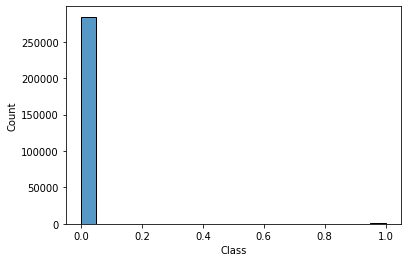

In [17]:
sns.histplot(
    data = data,
    x = "Class",
)

히스토그램으로도 안보인다. 이러한 데이터 불균형을 극복하는 방법은 여러가지가 있지만 여기서는 undersample 을 쓴다.

<AxesSubplot:xlabel='Amount', ylabel='Count'>

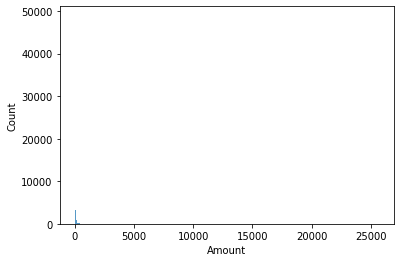

In [18]:
sns.histplot(
    data = data,
    x = "Amount"
)

In [19]:
data[["Amount"]].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


Amount의 경우 min-max 차이가 어마어마하고 평균에 비해 너무 큰 값들이 많이 있다. 이런 경우 로그를 취해서 분석하면 편리하다.

<AxesSubplot:ylabel='Frequency'>

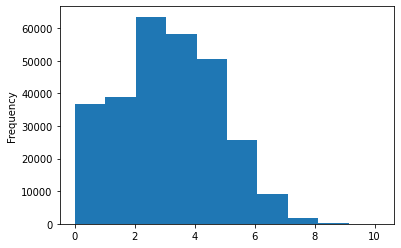

In [27]:
data["LogAmount"] = np.log(data["Amount"] + 1)
data["LogAmount"].sort_values().plot.hist()

로그를 이용한 분석
- log10과 log는 큰 차이가 없다.
- 지금은 소숫점 아래의 매우 작은 값과 매우 큰 값이 함깨 다뤄지는 것이 아니므로 log(x + 1e-8) 보다는 log(x + 1)이 경향성을 파악하는데 더 도움이 된다.

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
SSc = StandardScaler()

In [33]:
data["normAmount"]  = SSc.fit_transform(data[["Amount"]])
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,LogAmount,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0.570980,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,3.249987,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,4.232366,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,2.397895,-0.313249


이렇게 Standardization 된 데이터를 가지고 원문 저자는 사용하려고 한다.

In [35]:
data = data.drop(["Time", "Amount", "LogAmount"], axis =1)
# 의문의 무지성 드랍 ;;
# 주석과 설명이 스페인어로 작성되어 있는데 해석이 원활하지 못하다.
# undersample 을 배우는 것이 못표이므로 빠르게 넘어가자.

여기서 원문 작성자는 numpy의 모듈들을 사용하여 처리하는데 생각보다 수치해석에서 사용하는 넘파이와는 달랐다. 여기서 부터는 방법론만 따라가고 동일한 기능을 하는 Pandas 의 메소드들로 대체하도록 한다.

# UnderSampling

데이터간의 불균형은 모델의 과적합을 불러올 수 있다. 따라서 반드시 해결해 주어야 할 부분이다. 여기서는 더 많은 데이터인 Class == 0 인 값들을 없애서 균형을 맞춰주는 작업을 한다.

In [38]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [39]:
fraud_data = data[data["Class"] == 1]
normal_data = data[data["Class"] == 0]

print(len(fraud_data))
print(len(normal_data))

492
284315


In [41]:
normal_data = normal_data.sample(len(fraud_data))
normal_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0,492.000000
mean,-0.135338,-0.136921,-0.050806,-0.017499,0.069287,-0.089407,0.043560,0.039732,-0.004112,0.007877,...,0.000079,-0.044032,0.005934,0.018219,0.021581,0.022161,-0.009328,-0.012223,0.0,0.065152
std,2.217396,2.299620,1.390484,1.412359,1.532069,1.408466,1.177760,0.795149,1.122810,1.077425,...,0.536155,0.696165,0.530519,0.591214,0.556682,0.494454,0.361702,0.398206,0.0,1.004507
min,-26.054765,-37.154221,-4.741637,-4.551979,-7.566787,-12.709475,-7.004254,-5.922481,-2.938735,-2.798012,...,-2.151379,-2.847614,-2.681694,-1.847768,-2.682310,-1.282714,-2.867683,-4.601959,0.0,-0.353229
25%,-1.081245,-0.675724,-0.953425,-0.898947,-0.671331,-0.789438,-0.558005,-0.228914,-0.677920,-0.577824,...,-0.218982,-0.522796,-0.170839,-0.330196,-0.302725,-0.327751,-0.085499,-0.054903,0.0,-0.334408
50%,-0.123319,0.031689,0.165849,0.003004,-0.062554,-0.374945,0.045170,0.004278,-0.118528,-0.104103,...,-0.028163,-0.037978,0.007625,0.043551,0.032123,-0.043184,-0.008608,0.009302,0.0,-0.251938
75%,1.298706,0.786596,0.852889,0.815310,0.600312,0.258627,0.608828,0.374440,0.560603,0.407661,...,0.174634,0.454944,0.159152,0.476141,0.354046,0.282736,0.083320,0.075299,0.0,0.007868
max,2.255310,6.106655,3.201438,7.258823,14.929359,6.759367,8.737586,3.812810,6.073844,8.904159,...,4.293728,2.005923,4.909704,1.148516,2.065117,2.318224,2.049490,4.064853,0.0,8.283117


여기서는 Class 가 1인 데이터와 0인 데이터를 나누고 둘의 수를 동등하게 맞춰주기 위해서 Class == 0 인 데이터를 무작위로 뽑아냈다. 이제 이 둘을 합쳐주면 된다.

In [42]:
undersample = pd.concat([fraud_data, normal_data], axis = 0)
undersample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52843,-2.224591,-0.738729,1.005398,0.007358,0.262740,-0.237594,0.649279,0.451043,-0.370829,-1.386315,...,-0.020875,-0.917774,0.245006,-0.571478,0.593598,0.147525,-0.182173,-0.175111,0,0.627181
102286,-0.309470,1.088486,0.691242,0.363091,-0.188216,-0.535290,0.353941,0.376982,-0.758531,-0.518232,...,-0.325074,-1.105408,0.362213,0.043889,-0.813692,0.008267,-0.095433,-0.024301,0,-0.273268
40043,1.297866,0.350608,-0.136456,0.294677,0.343467,-0.063940,0.028998,-0.042347,-0.303641,-0.141956,...,-0.301164,-0.846042,-0.039654,-0.862408,0.376742,0.146583,-0.021390,0.010747,0,-0.349671
224918,0.331673,0.302651,0.935761,0.294867,-0.580818,-0.716185,0.117571,-0.011115,0.625537,-0.368643,...,0.391855,1.242352,0.170027,0.398839,-1.177609,-0.263229,0.218411,0.157247,0,-0.235126


이제 이 데이터에서 X와 Y를 구분하자.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X, y = undersample.drop("Class", axis = 1), undersample["Class"]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3)

만들어준 undersample 중에서 train과 test 를 구분해 주었다.

In [62]:
from sklearn.metrics import recall_score, accuracy_score
from sklearn.neural_network import MLPClassifier

In [63]:
MLP = MLPClassifier(
    hidden_layer_sizes=(200),
    activation='relu',
    learning_rate_init=0.001,
)

In [64]:
MLP.fit(X_tr,y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=200)

In [65]:
prediction = MLP.predict(X_te)
score = {
    'accuracy_score' : accuracy_score(prediction,y_te),
    'recall_score'   : recall_score(prediction,y_te)
}
score_df = pd.DataFrame(score.values(), index = score.keys(), columns = ["score"])
score_df

,score
accuracy_score,0.939189
recall_score,0.965753


그냥 맞춰버리넹

## ROC_AUC Curve

In [68]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass fpr=[0.         0.03521127 1.        ], tpr=[0.         0.91558442 1.        ], roc_auc=0.940186573989391 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


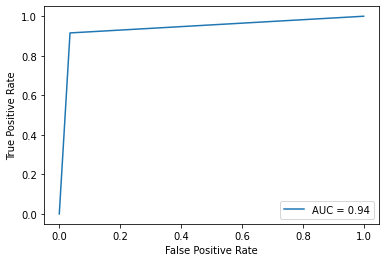

In [69]:
fpr, tpr, threshold = roc_curve(y_te,prediction)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr,tpr,roc_auc,)
display.plot()
plt.show()

In [71]:
prediction.shape

(296,)